**PRIMER PARCIAL**

MODELO 1

El dataset cuenta con mas de 50k de ejemplos y con 10 caracteristicas (quilates, corte, color, claridad, profundidad, tabla, precio, x, y, z).    

 Acerca de la moneda de la columna de precio: es Precio ($)

Y sobre las columnas x, y y z, son medidas de diamantes como ((x: largo en mm, y: ancho en mm,z: profundidad en mm))

El dataset se va a adecuar para el modelo de clasifiacion One vs All por prioridad ya que se tiene el corte con clasificaciones de corte como :

Fair=0

Good=1

Very good=4

Premium=3

Ideal=2






*PREPROCESAMIENTO DE DATOS CON PANDAS*

Importando librerias

In [2]:
import pandas as pd
import sklearn as skl

# Modulo de optimizacion en scipy
from scipy import optimize
import sys

# utilizado para manejos de directorios y rutas
import os

# Computacion vectorial y cientifica para python
import numpy as np

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

In [2]:
url = "C:/Users/kiens/OneDrive/Escritorio/1-24/SIS420/IA-SIS420/primerParcial/Modelo1/Dataset/Diamonds Prices2022.csv"
dataframe = pd.read_csv(url)
print(dataframe)

       Unnamed: 0  carat        cut color clarity  depth  table  price     x  \
0               1   0.23      Ideal     E     SI2   61.5   55.0    326  3.95   
1               2   0.21    Premium     E     SI1   59.8   61.0    326  3.89   
2               3   0.23       Good     E     VS1   56.9   65.0    327  4.05   
3               4   0.29    Premium     I     VS2   62.4   58.0    334  4.20   
4               5   0.31       Good     J     SI2   63.3   58.0    335  4.34   
...           ...    ...        ...   ...     ...    ...    ...    ...   ...   
53938       53939   0.86    Premium     H     SI2   61.0   58.0   2757  6.15   
53939       53940   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83   
53940       53941   0.71    Premium     E     SI1   60.5   55.0   2756  5.79   
53941       53942   0.71    Premium     F     SI1   59.8   62.0   2756  5.74   
53942       53943   0.70  Very Good     E     VS2   60.5   59.0   2757  5.71   

          y     z  
0      3.98  2.43  

Pasando los atributos de texto a numero

In [3]:
from sklearn.preprocessing import OrdinalEncoder
cut_cat = dataframe[['cut']]
color_cat = dataframe[['color']]
clarity_cat = dataframe[['clarity']]
print(cut_cat.head(10))
print(color_cat.head(10))
print(clarity_cat.head(10))

         cut
0      Ideal
1    Premium
2       Good
3    Premium
4       Good
5  Very Good
6  Very Good
7  Very Good
8       Fair
9  Very Good
  color
0     E
1     E
2     E
3     I
4     J
5     J
6     I
7     H
8     E
9     H
  clarity
0     SI2
1     SI1
2     VS1
3     VS2
4     SI2
5    VVS2
6    VVS1
7     SI1
8     VS2
9     VS1


In [4]:

#Caracteristica Corte columna el cual sera nuestra Y 
ordinal_encoder = OrdinalEncoder()
cut_cat_encoded = ordinal_encoder.fit_transform(cut_cat)
print(cut_cat_encoded[:10])
dataframe['cut'] = cut_cat_encoded
#Caracteristica claridad
clarity_cat_encoded = ordinal_encoder.fit_transform(clarity_cat)
dataframe['clarity'] = clarity_cat_encoded
print(clarity_cat_encoded[:10])
#Caracteristica color
color_cat_encoded = ordinal_encoder.fit_transform(color_cat)
dataframe['color'] = color_cat_encoded
print(color_cat_encoded[:10])


[[2.]
 [3.]
 [1.]
 [3.]
 [1.]
 [4.]
 [4.]
 [4.]
 [0.]
 [4.]]
[[3.]
 [2.]
 [4.]
 [5.]
 [3.]
 [7.]
 [6.]
 [2.]
 [5.]
 [4.]]
[[1.]
 [1.]
 [1.]
 [5.]
 [6.]
 [6.]
 [5.]
 [4.]
 [1.]
 [4.]]


In [5]:
print(dataframe.describe())

         Unnamed: 0         carat           cut         color       clarity  \
count  53943.000000  53943.000000  53943.000000  53943.000000  53943.000000   
mean   26972.000000      0.797935      2.553047      2.594127      3.835104   
std    15572.147122      0.473999      1.027702      1.701087      1.724587   
min        1.000000      0.200000      0.000000      0.000000      0.000000   
25%    13486.500000      0.400000      2.000000      1.000000      2.000000   
50%    26972.000000      0.700000      2.000000      3.000000      4.000000   
75%    40457.500000      1.040000      3.000000      4.000000      5.000000   
max    53943.000000      5.010000      4.000000      6.000000      7.000000   

              depth         table         price             x             y  \
count  53943.000000  53943.000000  53943.000000  53943.000000  53943.000000   
mean      61.749322     57.457251   3932.734294      5.731158      5.734526   
std        1.432626      2.234549   3989.338447    

Separar las caracteristicas de la etiqueta que usaremos para el entrenamiento

In [6]:
dataset = dataframe.drop("cut", axis=1)
label = dataframe["cut"].copy()

In [7]:
print(dataset)

       Unnamed: 0  carat  color  clarity  depth  table  price     x     y  \
0               1   0.23    1.0      3.0   61.5   55.0    326  3.95  3.98   
1               2   0.21    1.0      2.0   59.8   61.0    326  3.89  3.84   
2               3   0.23    1.0      4.0   56.9   65.0    327  4.05  4.07   
3               4   0.29    5.0      5.0   62.4   58.0    334  4.20  4.23   
4               5   0.31    6.0      3.0   63.3   58.0    335  4.34  4.35   
...           ...    ...    ...      ...    ...    ...    ...   ...   ...   
53938       53939   0.86    4.0      3.0   61.0   58.0   2757  6.15  6.12   
53939       53940   0.75    0.0      3.0   62.2   55.0   2757  5.83  5.87   
53940       53941   0.71    1.0      2.0   60.5   55.0   2756  5.79  5.74   
53941       53942   0.71    2.0      2.0   59.8   62.0   2756  5.74  5.73   
53942       53943   0.70    1.0      5.0   60.5   59.0   2757  5.71  5.76   

          z  
0      2.43  
1      2.31  
2      2.31  
3      2.63  
4    

In [8]:
print(label)

0        2.0
1        3.0
2        1.0
3        3.0
4        1.0
        ... 
53938    3.0
53939    2.0
53940    3.0
53941    3.0
53942    4.0
Name: cut, Length: 53943, dtype: float64


In [9]:
#dataset.to_csv('C:/Users/kiens/OneDrive/Escritorio/1-24/SIS420/IA-SIS420/primerParcial/Modelo1/Dataset/DiamondsProcesado.csv', index=False)
#label.to_csv('C:/Users/kiens/OneDrive/Escritorio/1-24/SIS420/IA-SIS420/primerParcial/Modelo1/Dataset/Label.csv', index=False)

**ONEVSALL**

In [10]:
# La entrada es de 11 elemento contando con x0
input_layer_size  = 11

# 5 etiquetas
num_labels = 5
#Datasaet ya procesado con panda 
datax= np.loadtxt('C:/Users/kiens/OneDrive/Escritorio/1-24/SIS420/IA-SIS420/primerParcial/Modelo1/Dataset/DiamondsProcesado.csv', delimiter=',')
datay = np.loadtxt('C:/Users/kiens/OneDrive/Escritorio/1-24/SIS420/IA-SIS420/primerParcial/Modelo1/Dataset/Label.csv')
#Considerando el 80% para el entrenamiento
Xtrain = datax[:43155, :]
ytrain = datay[:43155]
# 20% para el test
Xtest = datax[43155:,:]
ytest = datay[43155:]

m = ytrain.size

In [7]:
def  featureNormalize(X):
    #X_norm = X.copy()
    #mu = np.zeros(X.shape[1])
    #sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [12]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(Xtrain)
Xtest_norm = (Xtest - mu) / sigma

In [13]:
# Configurar la matriz adecuadamente, y agregar una columna de unos que corresponde al termino de intercepción.
m, n = Xtrain.shape

X = X_norm


In [14]:
def sigmoid(z):
    """
    Calcula la sigmoide de z.
    """
    return 1.0 / (1.0 + np.exp(-z))

In [15]:
def lrCostFunctionReg(theta, X, y,lambda_):
   
    m = y.size

    # convierte las etiquetas a valores enteros si son boleanos
    if y.dtype == bool:
        y = y.astype(int)

    J = 0
    grad = np.zeros(theta.shape)

    h = sigmoid(X.dot(theta.T))

    temp = theta
    temp[0] = 0

    #J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h))) + (lambda_ / (2 * m)) * np.sum(np.square(temp))

    grad = (1 / m) * (h - y).dot(X)
#     theta = theta - (alpha / m) * (h - y).dot(X)
    grad = grad + (lambda_ / m) * temp

    return J, grad
#    return J, theta

In [16]:
def oneVsAllReg(X, y, num_labels,lambda_):
    # algunas variables utiles
    m, n = X.shape

    all_theta = np.zeros((num_labels, n + 1))

    # Agrega unos a la matriz X
    X = np.concatenate([np.ones((m, 1)), X], axis=1)

    for c in np.arange(num_labels):
        initial_theta = np.zeros(n + 1)
        options = {'maxiter': 50}
        res = optimize.minimize(lrCostFunctionReg,
                                initial_theta,
                                #(X, (y == c)),
                                (X, (y == c), lambda_),
                                jac=True,
                                method='CG',
                                options=options)

        all_theta[c] = res.x

    return all_theta

In [17]:
lambda_ =0.01
all_theta = oneVsAllReg(X, ytrain, num_labels, lambda_)
#all_theta = oneVsAllReg(X, ytrain, num_labels)
print(all_theta.shape)

(5, 11)


C:\Users\kiens\AppData\Local\Temp\ipykernel_996\2220326297.py:18: RuntimeWarning: divide by zero encountered in log
  J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h))) + (lambda_ / (2 * m)) * np.sum(np.square(temp))
C:\Users\kiens\AppData\Local\Temp\ipykernel_996\2220326297.py:18: RuntimeWarning: divide by zero encountered in log
  J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h))) + (lambda_ / (2 * m)) * np.sum(np.square(temp))


In [18]:
print(all_theta)

[[ -4.99165055   0.14288122   0.71796507  -0.1918019    0.09931528
    1.40826742   0.88612539  -1.45978353   3.2683733   -3.42292562
    0.98812129]
 [ -2.61111383  -0.08345971  -0.0581229   -0.0849542   -0.09536368
    0.69910355   0.72955167  -0.2330689   -0.37345974   0.95119243
   -0.36300765]
 [ -0.86424608   0.06581103  -0.9305998    0.13008797   0.05119656
   -0.79247352  -2.19911073   0.62560532  -0.29125447  -0.08207886
    0.5886407 ]
 [ -1.20262737   0.07010234  -0.07719002   0.07410275  -0.03930091
   -0.25228988   0.71694972   0.12320833  10.92795664 -10.60614266
   -0.45618128]
 [ -1.26917284  -0.18860339  -0.18453847  -0.03433938   0.055354
    0.17354942   0.3440403    0.13394198  -0.94827446   0.78818062
    0.12776573]]


In [19]:
def predictOneVsAllReg(all_theta, X):
    m = X.shape[0];
    num_labels = all_theta.shape[0]

    p = np.zeros(m)

    # Add ones to the X data matrix
    X = np.concatenate([np.ones((m, 1)), X], axis=1)
    #p = np.argmax(sigmoid(X.dot(all_theta.T)), axis = 1)
    p = np.argmax(sigmoid(X.dot(all_theta.T)), axis=1)
    #print(X.shape)
    return p

In [20]:
import sys

pred = predictOneVsAllReg(all_theta, Xtest_norm)

print('Precision del conjuto de entrenamiento: {:.2f}%'.format(np.mean(pred == ytest) * 100))
print(pred)

print(ytest[:])
#print(pred[10787])
#print(ytest[10787])

Precision del conjuto de entrenamiento: 60.88%
[1 3 2 ... 2 3 3]
[1. 3. 4. ... 3. 3. 4.]


**MODELO 2**

El dataset cuenta con mas de 91k ejemplos y con 84 características que son datos medicos de un paciente que definen varios factores.

En base a estos factores se va a predicir si el paciente sobrevive o no, en el cual se usara el modelo de clasificacion(0,1)

*PREPROCESAMIENTO DE DATOS CON PANDAS*

In [86]:
url = "C:/Users/kiens/OneDrive/Escritorio/1-24/SIS420/IA-SIS420/primerParcial/Modelo2/Dataset/Dataset.csv"
dataframe2 = pd.read_csv(url)
print(dataframe2)

       encounter_id  patient_id  hospital_id   age        bmi  \
0             66154       25312          118  68.0  22.730000   
1            114252       59342           81  77.0  27.420000   
2            119783       50777          118  25.0  31.950000   
3             79267       46918          118  81.0  22.640000   
4             92056       34377           33  19.0        NaN   
...             ...         ...          ...   ...        ...   
91708         91592       78108           30  75.0  23.060250   
91709         66119       13486          121  56.0  47.179671   
91710          8981       58179          195  48.0  27.236914   
91711         33776      120598           66   NaN  23.297481   
91712          1671       53612          104  82.0  22.031250   

       elective_surgery  ethnicity gender  height           icu_admit_source  \
0                     0  Caucasian      M   180.3                      Floor   
1                     0  Caucasian      F   160.0          

In [87]:
print(dataframe2.describe())

#print(dataframe2.info())

        encounter_id     patient_id   hospital_id           age           bmi  \
count   91713.000000   91713.000000  91713.000000  87485.000000  88284.000000   
mean    65606.079280   65537.131464    105.669262     62.309516     29.185818   
std     37795.088538   37811.252183     62.854406     16.775119      8.275142   
min         1.000000       1.000000      2.000000     16.000000     14.844926   
25%     32852.000000   32830.000000     47.000000     52.000000     23.641975   
50%     65665.000000   65413.000000    109.000000     65.000000     27.654655   
75%     98342.000000   98298.000000    161.000000     75.000000     32.930206   
max    131051.000000  131051.000000    204.000000     89.000000     67.814990   

       elective_surgery        height        icu_id  pre_icu_los_days  \
count      91713.000000  90379.000000  91713.000000      91713.000000   
mean           0.183736    169.641588    508.357692          0.835766   
std            0.387271     10.795378    228.989661

Eliminar caracteristicas con valores nulos

In [88]:
#Las columnas que son numericos
dataframe_ = dataframe2.select_dtypes(include='number')

In [89]:
# Rellenar los valores nulos con el valor medio de cada columna
dataset_sin_nulos = dataframe_.fillna(dataframe_.mean())
print(dataset_sin_nulos)

       encounter_id  patient_id  hospital_id        age        bmi  \
0             66154       25312          118  68.000000  22.730000   
1            114252       59342           81  77.000000  27.420000   
2            119783       50777          118  25.000000  31.950000   
3             79267       46918          118  81.000000  22.640000   
4             92056       34377           33  19.000000  29.185818   
...             ...         ...          ...        ...        ...   
91708         91592       78108           30  75.000000  23.060250   
91709         66119       13486          121  56.000000  47.179671   
91710          8981       58179          195  48.000000  27.236914   
91711         33776      120598           66  62.309516  23.297481   
91712          1671       53612          104  82.000000  22.031250   

       elective_surgery  height  icu_id  pre_icu_los_days     weight  ...  \
0                     0   180.3      92          0.541667   73.90000  ...   
1    

In [91]:
print(dataset_sin_nulos.describe())

        encounter_id     patient_id   hospital_id           age           bmi  \
count   91713.000000   91713.000000  91713.000000  91713.000000  91713.000000   
mean    65606.079280   65537.131464    105.669262     62.309516     29.185818   
std     37795.088538   37811.252183     62.854406     16.383883      8.118970   
min         1.000000       1.000000      2.000000     16.000000     14.844926   
25%     32852.000000   32830.000000     47.000000     53.000000     23.787760   
50%     65665.000000   65413.000000    109.000000     64.000000     28.007812   
75%     98342.000000   98298.000000    161.000000     75.000000     32.653061   
max    131051.000000  131051.000000    204.000000     89.000000     67.814990   

       elective_surgery        height        icu_id  pre_icu_los_days  \
count      91713.000000  91713.000000  91713.000000      91713.000000   
mean           0.183736    169.641588    508.357692          0.835766   
std            0.387271     10.716578    228.989661

In [92]:
dataset = dataset_sin_nulos.drop("hospital_death", axis=1)
label = dataset_sin_nulos["hospital_death"].copy()

In [119]:
print(dataset.shape)

(91713, 77)


In [120]:
#dataset.to_csv('C:/Users/kiens/OneDrive/Escritorio/1-24/SIS420/IA-SIS420/primerParcial/Modelo2/Dataset/DatasetProcesado.csv', index=False)
#label.to_csv('C:/Users/kiens/OneDrive/Escritorio/1-24/SIS420/IA-SIS420/primerParcial/Modelo2/Dataset/Label.csv', index=False)

*CLASIFICACION*

In [54]:
# Cargar datos
datax = np.loadtxt('C:/Users/kiens/OneDrive/Escritorio/1-24/SIS420/IA-SIS420/primerParcial/Modelo2/Dataset/DatasetProcesado.csv', delimiter=',')
datay= np.loadtxt('C:/Users/kiens/OneDrive/Escritorio/1-24/SIS420/IA-SIS420/primerParcial/Modelo2/Dataset/Label.csv')
#80% de los datos para entrenamiento y 20% para test
X_train, y_train = datax[:73370, :], datay[:73370:]
X_test, y_test = datax[73370:, :], datay[73370:]
X = X_train
y = y_train
print(X)
print(y)

[[6.61540e+04 2.53120e+04 1.18000e+02 ... 0.00000e+00 0.00000e+00
  0.00000e+00]
 [1.14252e+05 5.93420e+04 8.10000e+01 ... 0.00000e+00 0.00000e+00
  0.00000e+00]
 [1.19783e+05 5.07770e+04 1.18000e+02 ... 0.00000e+00 0.00000e+00
  0.00000e+00]
 ...
 [1.25463e+05 3.00500e+04 3.70000e+01 ... 0.00000e+00 0.00000e+00
  0.00000e+00]
 [1.35830e+04 1.81700e+04 1.85000e+02 ... 0.00000e+00 0.00000e+00
  0.00000e+00]
 [1.25572e+05 8.30670e+04 1.57000e+02 ... 0.00000e+00 0.00000e+00
  0.00000e+00]]
[0. 0. 0. ... 0. 0. 0.]


In [55]:
def sigmoid(z):
    # Calcula la sigmoide de una entrada z
    # convierte la intrada a un arreglo numpy
    z = np.array(z)

    g = np.zeros(z.shape)

    g = 1 / (1 + np.exp(-z))

    return g

In [56]:
# llama featureNormalize que ya se tiene definido para las anteriores predicciones 
X_norm, mu, sigma = featureNormalize(X)

In [57]:
# Configurar la matriz adecuadamente, y agregar una columna de unos que corresponde al termino de intercepción.
m, n = X.shape
# Agraga el termino de intercepción a A
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)
# X = np.concatenate([np.ones((m, 1)), X], axis=1)

In [58]:
def calcularCostoReg(theta, X, y, lambda_):
    # Inicializar algunos valores utiles
    m = y.size  # numero de ejemplos de entrenamiento

    J = 0
    temp=theta
    temp[0]=0
    h = sigmoid(X.dot(theta.T))
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h))) + (lambda_ / (2 * m)) * np.sum(np.square(temp))
    
    return J

In [59]:
def descensoGradienteReg(theta, X, y, alpha, num_iters, lambda_):
    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()
    J_history = []

    for i in range(num_iters):
        h = sigmoid(X.dot(theta.T))
        temp=theta
        temp[0]=0
        theta = theta - (alpha / m) * (h - y).dot(X) + (lambda_ / m) * temp

        J_history.append(calcularCostoReg(theta, X, y, lambda_))
    return theta, J_history

theta calculado por el descenso por el gradiente: [ 0.         -0.00564992  0.00423868  0.00356476  0.06321185 -0.01558162
 -0.03666554  0.00790547  0.01838162  0.04626629 -0.01389501 -0.01494036
 -0.02858238 -0.0302694   0.00939427 -0.06097207 -0.11460923  0.03075447
 -0.0234006   0.01411799  0.02980266  0.01724424  0.02361241 -0.04117517
  0.06274682 -0.00834865 -0.01770252 -0.0060557  -0.01678814  0.05780799
 -0.02166993 -0.00233234 -0.02369563  0.00077892 -0.02075293  0.00183862
  0.02820902 -0.04432496 -0.13312721 -0.00436376 -0.02413526 -0.00172239
 -0.02230717 -0.02814977 -0.0930536   0.00720168  0.00203178  0.00665045
 -0.00889994 -0.00070985  0.01182136  0.00021574 -0.00612405  0.00090684
 -0.01729436  0.02098788  0.04733985 -0.01552753 -0.00096438 -0.00200612
  0.00111613  0.00337613 -0.00494745  0.02084066  0.02398093  0.04214845
  0.01074232  0.10367195  0.08193484  0.00326464  0.01938421 -0.02903189
  0.02219642  0.0183692   0.01771623  0.01150453  0.04180992]


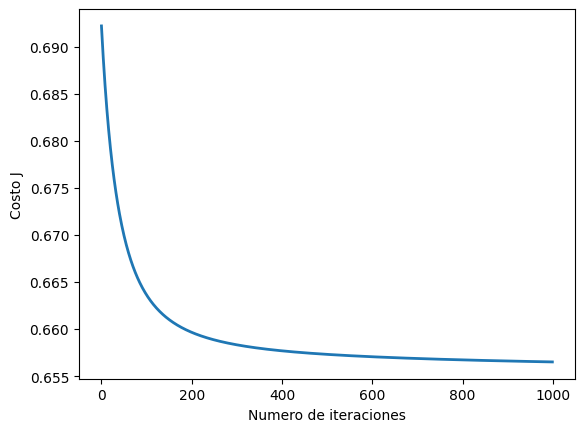

In [60]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.01
num_iters = 1000
lambda_ = 0.1 #0.01
# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(77)
theta, J_history = descensoGradienteReg(theta, X, y, alpha, num_iters,lambda_)
# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

In [62]:
# Normalizar el conjunto de características de prueba y obtener la media (mu) y la desviación estándar (sigma)
X_test_norm, mu, sigma = featureNormalize(X_test)

# Obtener las dimensiones de la matriz de características normalizadas
m, n = X_test_norm.shape

# Agregar una columna de unos al inicio de la matriz de características normalizadas
X_test_norm = np.concatenate([np.ones((m, 1)), X_test_norm], axis=1)

#Si el paciente sobrevive o no
sobrevive= sigmoid(np.dot(X_test_norm, theta))

# Imprimir las probabilidades de abandono calculadas para cada instancia en el conjunto de prueba
print(sobrevive)
print(y_test)

[0.4382356  0.56274496 0.4253374  ... 0.57339731 0.52898308 0.51931175]
[0. 0. 0. ... 0. 0. 0.]


In [63]:
#Efectividad
sobrevive[sobrevive >= 0.5] = 1
sobrevive[sobrevive < 0.5] = 0
print(sobrevive)
print(y_test)
#Porcentaje de acierto
porcentaje = np.mean(sobrevive == y_test) * 100
print("Porcentaje de acierto:", porcentaje)

[0. 1. 0. ... 1. 1. 1.]
[0. 0. 0. ... 0. 0. 0.]
Porcentaje de acierto: 65.33282451071253


In [64]:
print(sobrevive[101])
print(y_test[101])

0.0
0.0
